<a href="https://colab.research.google.com/github/moonkisung/DL-from-scratch-tutorial/blob/main/Ch4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 4.1 Learning in Data

## 4.1.1 Data-driven Learning

## 4.1.2 Train Data and Test Data

In [1]:
import numpy as np

# 4.2 Loss Function

## 4.2.1 Sum of Squares for Error

In [2]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [3]:
def sum_squares_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [4]:
sum_squares_error(np.array(y), np.array(t))

0.09750000000000003

In [5]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
sum_squares_error(np.array(y), np.array(t))

0.5975

## 4.2.2 Cross Entropy Error

In [6]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [7]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [8]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

## 4.2.3 Minibatch Learning

In [9]:
!git clone https://github.com/WegraLee/deep-learning-from-scratch

Cloning into 'deep-learning-from-scratch'...
remote: Enumerating objects: 826, done.
remote: Total 826 (delta 0), reused 0 (delta 0), pack-reused 826
Receiving objects: 100% (826/826), 52.21 MiB | 36.82 MiB/s, done.
Resolving deltas: 100% (477/477), done.


In [10]:
%cd /content/deep-learning-from-scratch/ch04

/content/deep-learning-from-scratch/ch04


In [11]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
(60000, 784)
(60000, 10)


In [12]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

## 4.2.4 (For Batch)Implementing Cross Entropy Loss

In [13]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

y = np.array([0.1,0.5,0.7])
t = np.array([0,0,1])
cross_entropy_error(y, t)

0.3566748010815999

In [14]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t]))

##4.2.5 Why set up Loss Function?

# 4.3 Numerical Differentiation

## 4.3.1 Differentiation

In [15]:
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h)-f(x-h)) / (2*h)

## 4.3.2 Examples of Numerical Differentiation

In [16]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

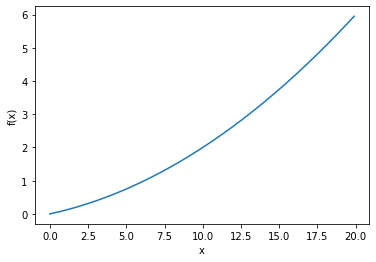

In [17]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0, 20.0, 0.1)  # 20은 미포함
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [18]:
numerical_diff(function_1, 5)

0.1999999999990898

In [19]:
numerical_diff(function_1, 10)

0.2999999999986347

## 4.3.3 Partial derivative

In [20]:
def function_2(x):
    return x[0]**2 + x[1]**2
    return np.sum(x**2)

In [21]:
# Problem 1: When x0 = 3, x1 = 4, Calculate partial derivative about x0
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [22]:
# Problem 2: When x0 = 3, x1 = 4, Calculate partial derivative about x1
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

In [23]:
numerical_diff(function_tmp2, 4.0)

7.999999999999119

# 4.4 Gradient

In [24]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)  # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        # Calculating f(x+h)
        x[idx] = tmp_val + h
        fxh1 = f(x)
        # print(fxh1)
        # Calculation f(x-h)
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val  # restoring values

    return grad

In [25]:
np.array([2,4]).size

2

In [26]:
np.zeros_like(np.array([2,4]))

array([0, 0])

In [27]:
# def function_2(x):
#     return x[0]**2 + x[1]**2
#     return np.sum(x**2)

In [28]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [29]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [30]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

## 4.4.1 Gradient method(Gradient Descent Method)

In [31]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

In [32]:
# Problem : Calculating minimum values using gradient method
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

In [33]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

In [34]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

array([-2.99999994,  3.99999992])

## 4.4.2 Gradient in Neural Network

In [35]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

In [36]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # initializing normal distribution

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

In [37]:
net = simpleNet()
print(net.W)

[[ 0.65602462  0.83133543 -0.71086548]
 [ 0.977846    0.61654707  0.30627754]]


In [38]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[ 1.27367617  1.05369362 -0.15086951]


In [39]:
np.argmax(p)

0

In [40]:
softmax(p)

array([0.48944019, 0.39279181, 0.117768  ])

In [41]:
t = np.array([0, 0, 1])
net.loss(x, t)

2.139037834538429

In [42]:
def f(W):
    return net.loss(x, t)

In [43]:
f = lambda w: net.loss(x, t)

In [44]:
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.29366387  0.23567488 -0.52933875]
 [ 0.4404958   0.35351233 -0.79400812]]


# 4.5 Implement Learning Algorithm

## 4.5.1 Implement Two layer Neural Network Class

In [45]:
import sys, os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # Initializing Weights
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = sigmoid(z1)

        return y
    
    # x : input data, t : true label
    def loss(x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

In [46]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [47]:
x = np.random.rand(100, 784)
y = net.predict(x)
print(y)

[[0.61856961 0.61709703 0.62815774 ... 0.6183943  0.62964834 0.61257952]
 [0.60753324 0.61645418 0.62367291 ... 0.62315102 0.62923447 0.60656029]
 [0.61143406 0.6124368  0.62816545 ... 0.61522334 0.63151617 0.60784339]
 ...
 [0.60816273 0.61428203 0.63094415 ... 0.62629401 0.63131501 0.60863075]
 [0.61811084 0.61058916 0.62270258 ... 0.63021305 0.62760034 0.61197988]
 [0.61547522 0.61567039 0.62247645 ... 0.62127281 0.63022683 0.61788625]]


## 4.5.2 Implement Mini-batch Learning


In [ ]:
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

# Hyperparameter
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100  # Minibatch Size
learning_rate = 0.1
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    # Obtaining Mini-batch
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # Calculating gradient
    grad = network.numerical_gradient(x_batch, t_batch)
    # grad = network.gradient(x_batch, t_batch) # Performance improvement version

    # Hyperparameter update
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # Recording Learning Process
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

## 4.5.3 Validation using test data

In [ ]:
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# Hyperparameter
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100  # Minibatch Size
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # Obtaining Mini-batch
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # Calculating gradient
    grad = network.numerical_gradient(x_batch, t_batch)
    # grad = network.gradient(x_batch, t_batch) # Performance improvement version

    # Hyperparameter update
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # Recording Learning Process
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    # Calculating accuracy per 1epoch
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc : "
            + str(train_acc) + ", " = str(test_acc))